In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd
import scipy.stats as sts
from scipy.stats import linregress
import seaborn as sns

# File to Load (Remember to Change These)
file = "Cleaned_Data/Clearned_Original_Data"

# Read Purchasing File and store into Pandas data frame
games = pd.read_csv(file)
games.head()

,Unnamed: 0,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,Global_Sales,Critic_Score,User_Score,User_Count
0,0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,82.53,76.0,8,322.0
1,1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,40.24,NaN,NaN,NaN
2,2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,35.52,82.0,8.3,709.0
3,3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,32.77,80.0,8,192.0
4,4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,31.37,NaN,NaN,NaN


games.describe()

In [2]:
games.describe()

,Unnamed: 0,Year_of_Release,NA_Sales,Global_Sales,Critic_Score,User_Count
count,16719.000000,16450.000000,16719.000000,16719.000000,8137.000000,7590.000000
mean,8359.000000,2006.487356,0.263330,0.533543,68.967679,162.229908
std,4826.503911,5.878995,0.813514,1.547935,13.938165,561.282326
min,0.000000,1980.000000,0.000000,0.010000,13.000000,4.000000
25%,4179.500000,2003.000000,0.000000,0.060000,60.000000,10.000000
50%,8359.000000,2007.000000,0.080000,0.170000,71.000000,24.000000
75%,12538.500000,2010.000000,0.240000,0.470000,79.000000,81.000000
max,16718.000000,2020.000000,41.360000,82.530000,98.000000,10665.000000


In [3]:
# Set index to year

year = games.set_index("Year_of_Release").sort_values(by="Year_of_Release", ascending=False)
year

,Unnamed: 0,Name,Platform,Genre,Publisher,NA_Sales,Global_Sales,Critic_Score,User_Score,User_Count
Year_of_Release,,,,,,,,,,
2020.0,5936,Imagine: Makeup Artist,DS,Simulation,Ubisoft,0.27,0.29,NaN,tbd,NaN
2017.0,14086,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,Role-Playing,Sega,0.00,0.04,NaN,NaN,NaN
2017.0,16385,Brothers Conflict: Precious Baby,PSV,Action,Idea Factory,0.00,0.01,NaN,NaN,NaN
2017.0,16222,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,Role-Playing,Sega,0.00,0.01,NaN,NaN,NaN
2016.0,16718,Winning Post 8 2016,PSV,Simulation,Tecmo Koei,0.00,0.01,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
NaN,16376,PDC World Championship Darts 2008,PSP,Sports,Oxygen Interactive,0.01,0.01,43.0,tbd,NaN
NaN,16409,Freaky Flyers,GC,Racing,Unknown,0.01,0.01,69.0,6.5,6.0
NaN,16452,Inversion,PC,Shooter,Namco Bandai Games,0.01,0.01,59.0,6.7,107.0


In [4]:
# dropping null values

year_clean = year.dropna(how="any")
year_clean
year_clean.sort_values(by="NA_Sales", ascending=False).iloc[0:25,:]

,Unnamed: 0,Name,Platform,Genre,Publisher,NA_Sales,Global_Sales,Critic_Score,User_Score,User_Count
Year_of_Release,,,,,,,,,,
2006.0,0,Wii Sports,Wii,Sports,Nintendo,41.36,82.53,76.0,8,322.0
2008.0,2,Mario Kart Wii,Wii,Racing,Nintendo,15.68,35.52,82.0,8.3,709.0
2009.0,3,Wii Sports Resort,Wii,Sports,Nintendo,15.61,32.77,80.0,8,192.0
2010.0,14,Kinect Adventures!,X360,Misc,Microsoft Game Studios,15.00,21.81,61.0,6.3,106.0
2009.0,8,New Super Mario Bros. Wii,Wii,Platform,Nintendo,14.44,28.32,87.0,8.4,594.0
2006.0,7,Wii Play,Wii,Misc,Nintendo,13.96,28.92,58.0,6.6,129.0
2006.0,6,New Super Mario Bros.,DS,Platform,Nintendo,11.28,29.80,89.0,8.5,431.0
2005.0,11,Mario Kart DS,DS,Racing,Nintendo,9.71,23.21,91.0,8.6,464.0
2010.0,32,Call of Duty: Black Ops,X360,Shooter,Activision,9.70,14.61,87.0,6.3,1454.0


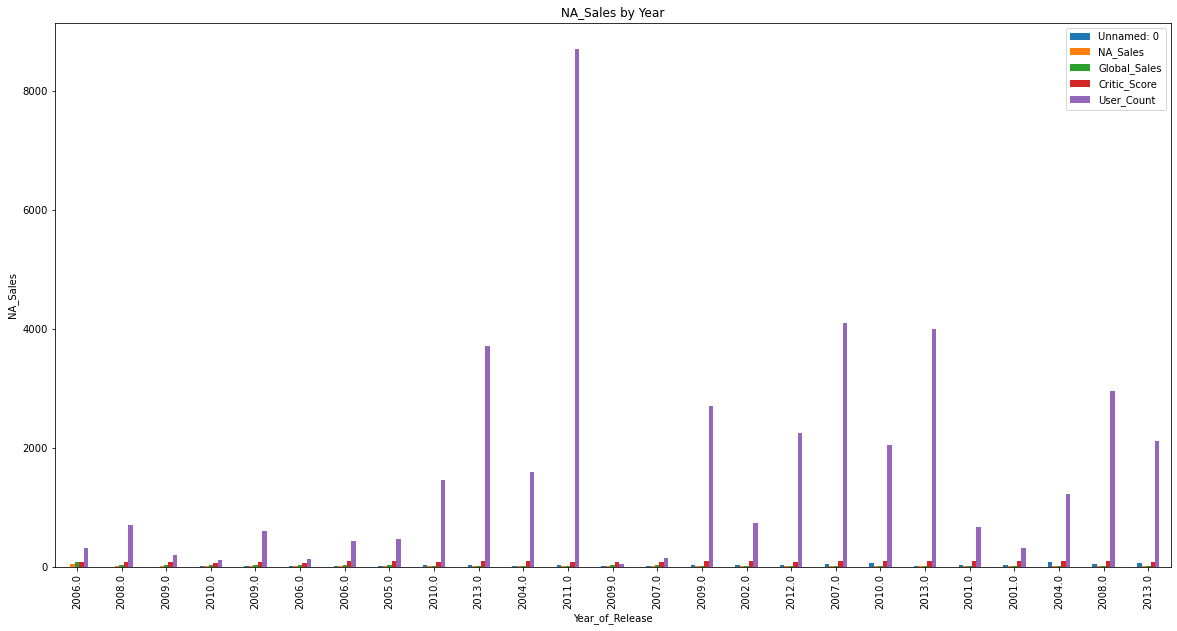

<Figure size 432x288 with 0 Axes>

In [5]:

year_clean.sort_values(by="NA_Sales", ascending=False).iloc[0:25,:].plot(kind="bar", figsize=(20,10))

plt.xlabel("Year_of_Release",fontsize = 10)
plt.ylabel("NA_Sales",fontsize = 10)
plt.title("NA_Sales by Year")

plt.show()
plt.tight_layout()



In [6]:
games_year = games.groupby("Year_of_Release")
games_year.head()

,Unnamed: 0,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,Global_Sales,Critic_Score,User_Score,User_Count
0,0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,82.53,76.0,8,322.0
1,1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,40.24,NaN,NaN,NaN
2,2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,35.52,82.0,8.3,709.0
3,3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,32.77,80.0,8,192.0
4,4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,31.37,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2650,2650,Boxing,2600,1980.0,Fighting,Activision,0.72,0.77,NaN,NaN,NaN
5936,5936,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.29,NaN,tbd,NaN
14086,14086,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.00,0.04,NaN,NaN,NaN
16222,16222,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0.00,0.01,NaN,NaN,NaN


In [51]:
#counting unique Publisher in data

games.Publisher.value_counts()


Electronic Arts                 1356
Activision                       985
Namco Bandai Games               939
Ubisoft                          933
Konami Digital Entertainment     834
                                ... 
Imageworks                         1
Commseed                           1
Grand Prix Games                   1
Takuyo                             1
2D Boy                             1
Name: Publisher, Length: 581, dtype: int64

In [7]:
publisher = games.groupby("Publisher")
publisher.head()

,Unnamed: 0,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,Global_Sales,Critic_Score,User_Score,User_Count
0,0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,82.53,76.0,8,322.0
1,1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,40.24,NaN,NaN,NaN
2,2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,35.52,82.0,8.3,709.0
3,3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,32.77,80.0,8,192.0
4,4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,31.37,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16648,16648,Eve: Burst Error R,PSV,2016.0,Action,Red Flagship,0.00,0.01,NaN,NaN,NaN
16661,16661,Dramatical Murder Re:code,PSV,2014.0,Adventure,Nitroplus,0.00,0.01,NaN,NaN,NaN
16664,16664,Prison Architect,XOne,2016.0,Action,Introversion Software,0.01,0.01,74.0,6.7,7.0
16682,16682,End of Nations,PC,2012.0,Strategy,Trion Worlds,0.01,0.01,NaN,NaN,NaN


In [8]:
pub_count = publisher.count()
pub_count
pub_count

,Unnamed: 0,Name,Platform,Year_of_Release,Genre,NA_Sales,Global_Sales,Critic_Score,User_Score,User_Count
Publisher,,,,,,,,,,
10TACLE Studios,3,3,3,3,3,3,3,1,1,1
1C Company,3,3,3,3,3,3,3,3,3,3
20th Century Fox Video Games,5,5,5,5,5,5,5,0,0,0
2D Boy,1,1,1,1,1,1,1,1,1,1
3DO,36,36,36,36,36,36,36,17,18,15
...,...,...,...,...,...,...,...,...,...,...
id Software,1,1,1,1,1,1,1,1,1,1
imageepoch Inc.,2,2,2,2,2,2,2,0,0,0
inXile Entertainment,1,1,1,1,1,1,1,1,1,1


In [9]:
pub_count = pub_count.sort_values(by="NA_Sales", ascending=False)
pub_count

,Unnamed: 0,Name,Platform,Year_of_Release,Genre,NA_Sales,Global_Sales,Critic_Score,User_Score,User_Count
Publisher,,,,,,,,,,
Electronic Arts,1356,1356,1356,1344,1356,1356,1356,1029,1141,1026
Activision,985,985,985,976,985,985,985,569,783,573
Namco Bandai Games,939,939,939,935,939,939,939,279,312,265
Ubisoft,933,933,933,930,933,933,933,558,788,557
Konami Digital Entertainment,834,834,834,825,834,834,834,328,379,270
...,...,...,...,...,...,...,...,...,...,...
New World Computing,1,1,1,1,1,1,1,0,0,0
Simon & Schuster Interactive,1,1,1,1,1,1,1,0,0,0
New,1,1,1,1,1,1,1,0,0,0


In [10]:
# Total player count by gender including duplicate players

years_count = games_year.count()
years_count

,Unnamed: 0,Name,Platform,Genre,Publisher,NA_Sales,Global_Sales,Critic_Score,User_Score,User_Count
Year_of_Release,,,,,,,,,,
1980.0,9,9,9,9,9,9,9,0,0,0
1981.0,46,46,46,46,46,46,46,0,0,0
1982.0,36,36,36,36,36,36,36,0,0,0
1983.0,17,17,17,17,17,17,17,0,0,0
1984.0,14,14,14,14,14,14,14,0,0,0
1985.0,14,14,14,14,14,14,14,1,1,1
1986.0,21,21,21,21,21,21,21,0,0,0
1987.0,16,16,16,16,16,16,16,0,0,0
1988.0,15,15,15,15,15,15,15,1,1,1


In [11]:
# NA sales by yeear
print(games_year["NA_Sales"].max())
print(games_year["NA_Sales"].min())

Year_of_Release
1980.0     4.00
1981.0     4.21
1982.0     7.28
1983.0     1.22
1984.0    26.93
1985.0    29.08
1986.0     3.74
1987.0     2.19
1988.0     9.54
1989.0    23.20
1990.0    12.78
1991.0     3.03
1992.0     6.16
1993.0     5.99
1994.0     4.36
1995.0     2.26
1996.0    11.27
1997.0     5.80
1998.0     5.89
1999.0     9.00
2000.0     3.05
2001.0     6.99
2002.0     8.41
2003.0     4.12
2004.0     9.43
2005.0     9.71
2006.0    41.36
2007.0     8.92
2008.0    15.68
2009.0    15.61
2010.0    15.00
2011.0     9.04
2012.0     8.25
2013.0     9.66
2014.0     4.35
2015.0     6.03
2016.0     2.98
2017.0     0.00
2020.0     0.27
Name: NA_Sales, dtype: float64
Year_of_Release
1980.0    0.22
1981.0    0.12
1982.0    0.13
1983.0    0.01
1984.0    0.00
1985.0    0.00
1986.0    0.00
1987.0    0.00
1988.0    0.00
1989.0    0.00
1990.0    0.00
1991.0    0.00
1992.0    0.00
1993.0    0.00
1994.0    0.00
1995.0    0.00
1996.0    0.00
1997.0    0.00
1998.0    0.00
1999.0    0.00
2000.0    0.0

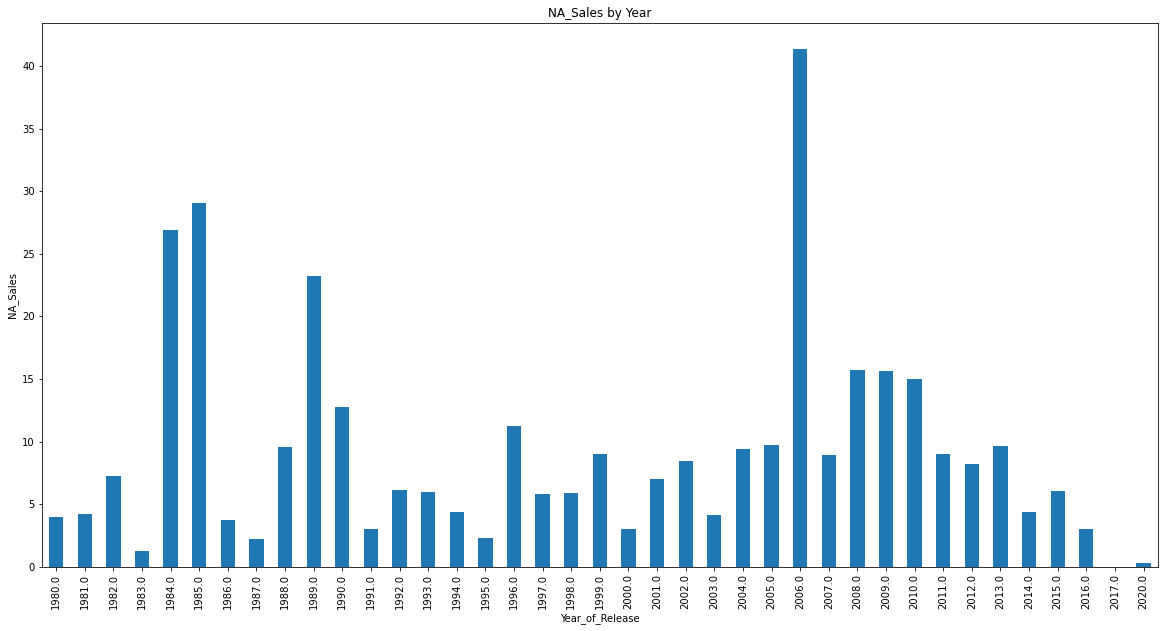

<Figure size 432x288 with 0 Axes>

In [12]:
#year_clean.sort_values(by="NA_Sales", ascending=False).iloc[0:25,:].plot(kind="bar", figsize=(20,10))

games_year["NA_Sales"].max().plot(kind="bar", figsize=(20,10))
plt.xlabel("Year_of_Release",fontsize = 10)
plt.ylabel("NA_Sales",fontsize = 10)
plt.title("NA_Sales by Year", fontsize=25)

plt.savefig('Output Data/NA_Sales by Year.png')
plt.show()
plt.tight_layout()


In [54]:
# filtering the data to get NA_Sales for 2006

year2006 = games.loc[games['Year_of_Release'] == 2006.0]
year2006.head()

,Unnamed: 0,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,Global_Sales,Critic_Score,User_Score,User_Count
0,0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,82.53,76.0,8,322.0
6,6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,29.80,89.0,8.5,431.0
7,7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,28.92,58.0,6.6,129.0
20,20,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,Nintendo,6.38,18.25,NaN,NaN,NaN
107,107,The Legend of Zelda: Twilight Princess,Wii,2006.0,Action,Nintendo,3.74,7.15,95.0,9,1658.0


In [13]:
print(publisher["NA_Sales"].max().sort_values(ascending=False))
#plt.bar(range(len(df)), df["count"], color=plt.cm.Paired(np.arange(len(df))))

Publisher
Nintendo                  41.36
Microsoft Game Studios    15.00
Activision                 9.70
Take-Two Interactive       9.66
Atari                      7.28
                          ...  
Prototype                  0.00
Gaga                       0.00
GOA                        0.00
Quest                      0.00
Rocket Company             0.00
Name: NA_Sales, Length: 581, dtype: float64


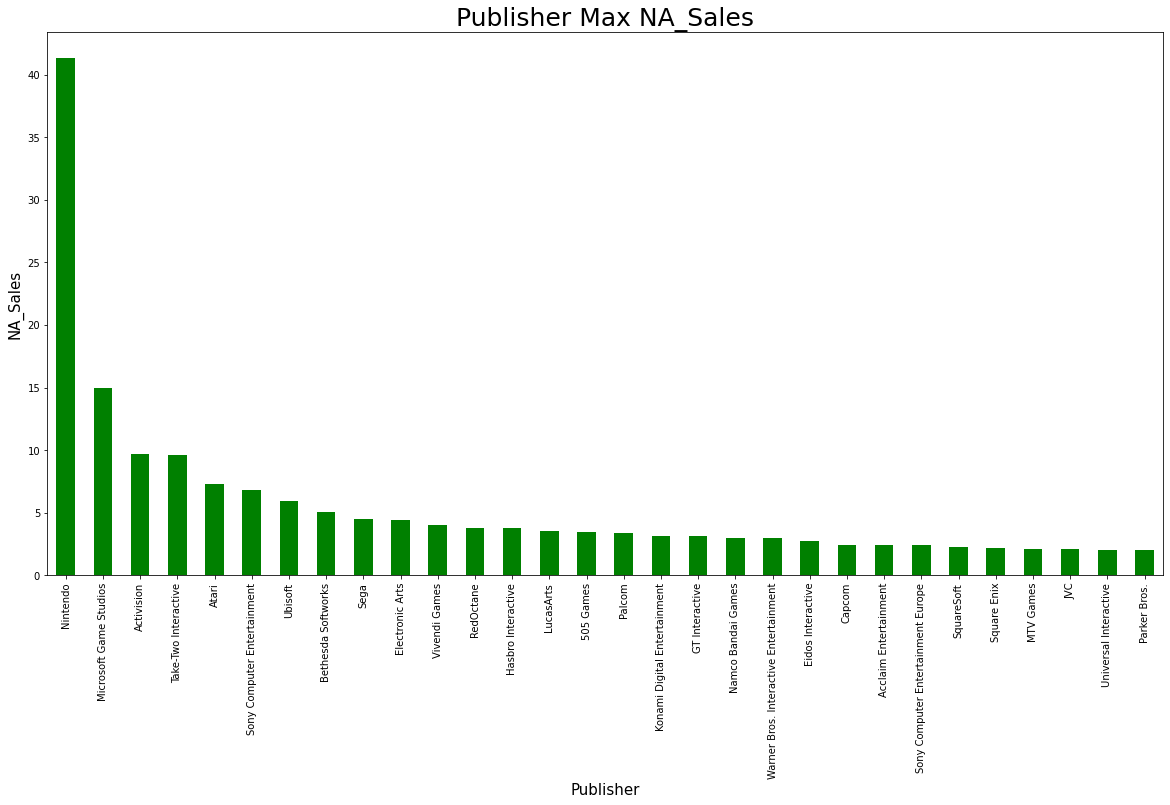

<Figure size 432x288 with 0 Axes>

In [50]:
# Max NA_Sales by Publisher top 30
pub_sort=publisher["NA_Sales"].max().sort_values(ascending=False)
pub_sort.head(30).plot(kind="bar", figsize=(20,10), color='g')

#pub_sort.head(30["NA_Sales"].max())
plt.xlabel("Publisher",fontsize = 15)
plt.ylabel("NA_Sales",fontsize = 15)
plt.title("Publisher Max NA_Sales", fontsize=25)

plt.savefig('Output Data/Publisher Max NA_Sales.png')
plt.show()
plt.tight_layout()


In [15]:
print(games_year["NA_Sales"].sum())



Year_of_Release
1980.0     10.59
1981.0     33.40
1982.0     26.92
1983.0      7.76
1984.0     33.28
1985.0     33.73
1986.0     12.50
1987.0      8.46
1988.0     23.87
1989.0     45.15
1990.0     25.46
1991.0     12.76
1992.0     33.89
1993.0     16.90
1994.0     28.16
1995.0     24.83
1996.0     86.76
1997.0     94.75
1998.0    128.36
1999.0    126.06
2000.0     94.50
2001.0    173.98
2002.0    216.19
2003.0    193.61
2004.0    222.51
2005.0    242.15
2006.0    262.13
2007.0    309.89
2008.0    348.69
2009.0    335.55
2010.0    300.65
2011.0    238.79
2012.0    153.26
2013.0    153.65
2014.0    132.27
2015.0    106.86
2016.0     44.93
2017.0      0.00
2020.0      0.27
Name: NA_Sales, dtype: float64


In [16]:
year_sum =games_year["NA_Sales"].sum().to_frame("NA_Sales")
year_sum

year_sum = year_sum.reset_index()
year_sum

,Year_of_Release,NA_Sales
0,1980.0,10.59
1,1981.0,33.40
2,1982.0,26.92
3,1983.0,7.76
4,1984.0,33.28
5,1985.0,33.73
6,1986.0,12.50
7,1987.0,8.46
8,1988.0,23.87
9,1989.0,45.15


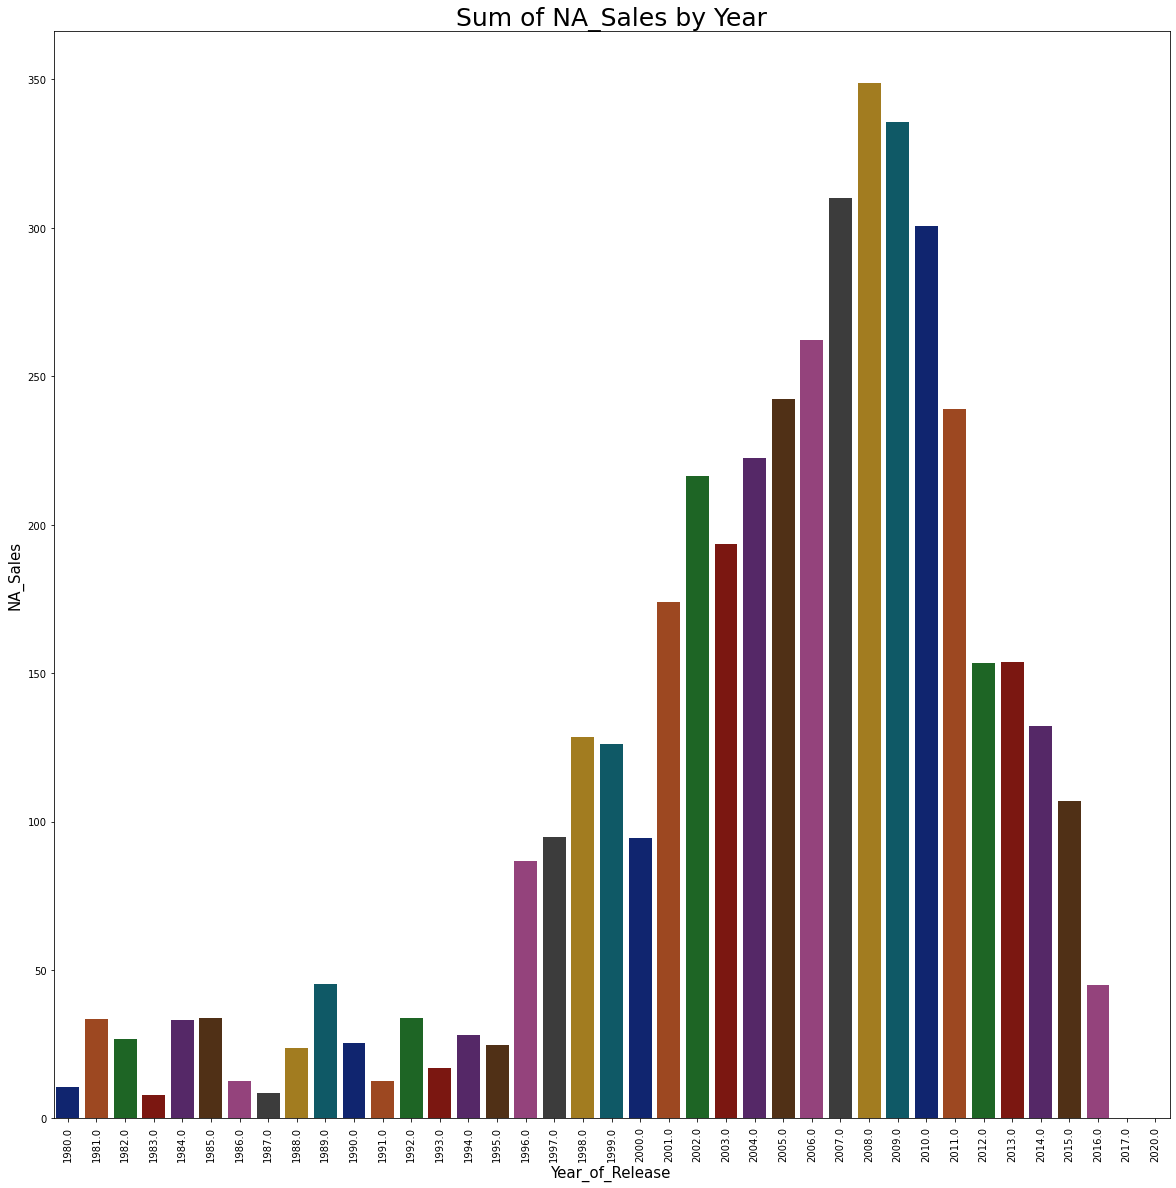

In [17]:
plt.figure(figsize = (20,20))
sns.barplot(x = year_sum["Year_of_Release"], y = year_sum["NA_Sales"], palette = sns. color_palette("dark"))
plt.title("Sum of NA_Sales by Year", fontsize = 25)
plt.xlabel("Year_of_Release", fontsize = 15)
plt.ylabel("NA_Sales", fontsize = 15)
plt.xticks(rotation=90)

plt.savefig('Output Data/Sum of NA_Sales by Year.png')
plt.show()


In [55]:
# filtering the data to get NA_Sales for 2006

year2008 = games.loc[games['Year_of_Release'] == 2008.0]
year2008.head()

,Unnamed: 0,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,Global_Sales,Critic_Score,User_Score,User_Count
2,2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,35.52,82.0,8.3,709.0
39,39,Super Smash Bros. Brawl,Wii,2008.0,Fighting,Nintendo,6.62,12.84,93.0,8.9,1662.0
51,51,Grand Theft Auto IV,X360,2008.0,Action,Take-Two Interactive,6.76,11.01,98.0,7.9,2951.0
57,57,Grand Theft Auto IV,PS3,2008.0,Action,Take-Two Interactive,4.76,10.50,98.0,7.5,2833.0
90,90,Pokémon Platinum Version,DS,2008.0,Role-Playing,Nintendo,2.76,7.72,83.0,8.5,203.0


In [56]:
year2008.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1427 entries, 2 to 16713
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1427 non-null   int64  
 1   Name             1427 non-null   object 
 2   Platform         1427 non-null   object 
 3   Year_of_Release  1427 non-null   float64
 4   Genre            1427 non-null   object 
 5   Publisher        1427 non-null   object 
 6   NA_Sales         1427 non-null   float64
 7   Global_Sales     1427 non-null   float64
 8   Critic_Score     715 non-null    float64
 9   User_Score       987 non-null    object 
 10  User_Count       661 non-null    float64
dtypes: float64(5), int64(1), object(5)
memory usage: 133.8+ KB


In [57]:
year2008_sum =year2008["NA_Sales"].sum() #.to_frame("NA_Sales")
year2008_sum

348.69

In [61]:
year2008.Publisher.value_counts()

Electronic Arts                 120
Ubisoft                         112
Activision                       88
Sega                             67
Konami Digital Entertainment     64
                               ... 
Telegames                         1
Ivolgamus                         1
IE Institute                      1
Broccoli                          1
Lexicon Entertainment             1
Name: Publisher, Length: 165, dtype: int64

In [59]:
print(year2008.Publisher.unique())

['Nintendo' 'Take-Two Interactive' 'Activision' 'Microsoft Game Studios'
 'Konami Digital Entertainment' 'Sony Computer Entertainment' 'Capcom'
 'Sega' 'Bethesda Softworks' 'Electronic Arts'
 'Warner Bros. Interactive Entertainment' 'Disney Interactive Studios'
 'THQ' 'LucasArts' 'Ubisoft' 'Square Enix' 'Midway Games'
 'Namco Bandai Games' 'Atari' 'MTV Games' 'Deep Silver'
 'Eidos Interactive' 'Codemasters' 'GSP' 'Tecmo Koei' 'Koch Media'
 'Pinnacle' '505 Games' 'Atlus' 'Nobilis' 'Touchstone' 'Rising Star Games'
 'Vivendi Games' 'System 3 Arcade Software' 'Empire Interactive'
 'Gamebridge' 'Rondomedia' 'City Interactive' 'Scholastic Inc.'
 'D3Publisher' 'Xplosiv' 'RTL' 'Tomy Corporation' 'Activision Value'
 'Takara Tomy' 'Game Factory' 'Zushi Games' 'Brash Entertainment'
 'Hudson Soft' 'Enterbrain' 'Zoo Digital Publishing' 'Zoo Games' 'Spike'
 'Destineer' 'Nordic Games' 'Majesco Entertainment' 'DTP Entertainment'
 'Black Bean Games' 'Nippon Ichi Software' 'PopCap Games'
 'Oxygen Intera

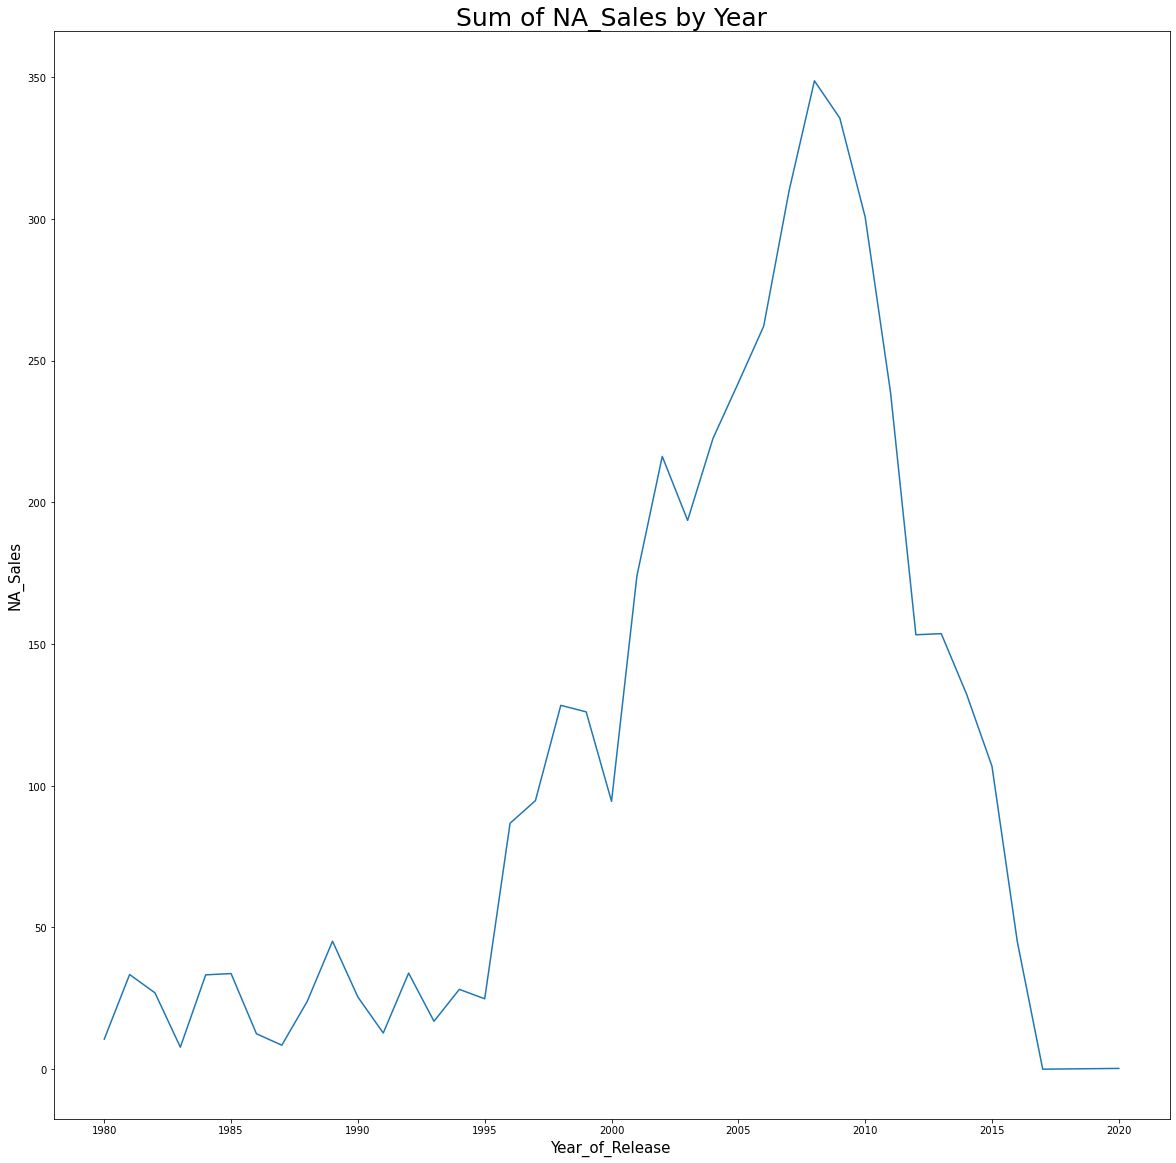

In [18]:
plt.figure(figsize = (20,20))
sns.lineplot(x = year_sum["Year_of_Release"], y = year_sum["NA_Sales"], palette = sns. color_palette("dark"))
plt.title("Sum of NA_Sales by Year", fontsize = 25)
plt.xlabel("Year_of_Release", fontsize = 15)
plt.ylabel("NA_Sales", fontsize = 15)

plt.savefig('Output Data/Sum of NA_Sales by Year.png')
plt.show()


In [19]:
#counting unique Genre in data

games.Genre.value_counts()


Action          3370
Sports          2348
Misc            1750
Role-Playing    1500
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       874
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

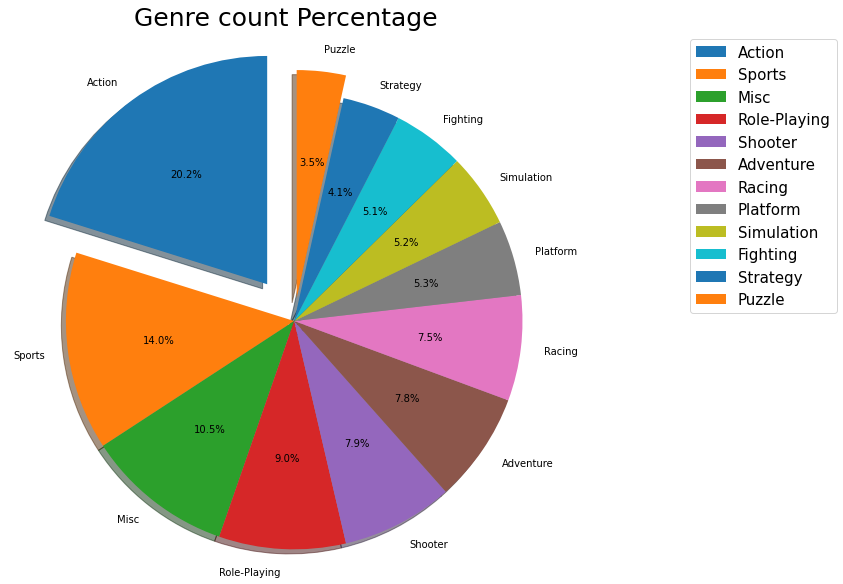

In [43]:
labels = games.Genre.value_counts().index
sizes = games.Genre.value_counts().values
explode = (0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1)

plt.figure(figsize = (10,10))
plt.pie(sizes, labels = labels, explode=explode, autopct="%1.1f%%", shadow=True, startangle=90)
plt.legend(loc="upper right", bbox_to_anchor=(1.5,1), fontsize=15)
plt.title("Genre count Percentage", fontsize=25)
plt.axis("equal")
plt.savefig('Output Data/Genre Count Percentage.png')
plt.show()


In [44]:
print(publisher["NA_Sales"].sum().sort_values(ascending=False))

Publisher
Nintendo                       816.97
Electronic Arts                599.50
Activision                     432.59
Sony Computer Entertainment    266.17
Ubisoft                        252.74
                                ...  
Game Arts                        0.00
Quest                            0.00
Quinrose                         0.00
Quintet                          0.00
SCS Software                     0.00
Name: NA_Sales, Length: 581, dtype: float64


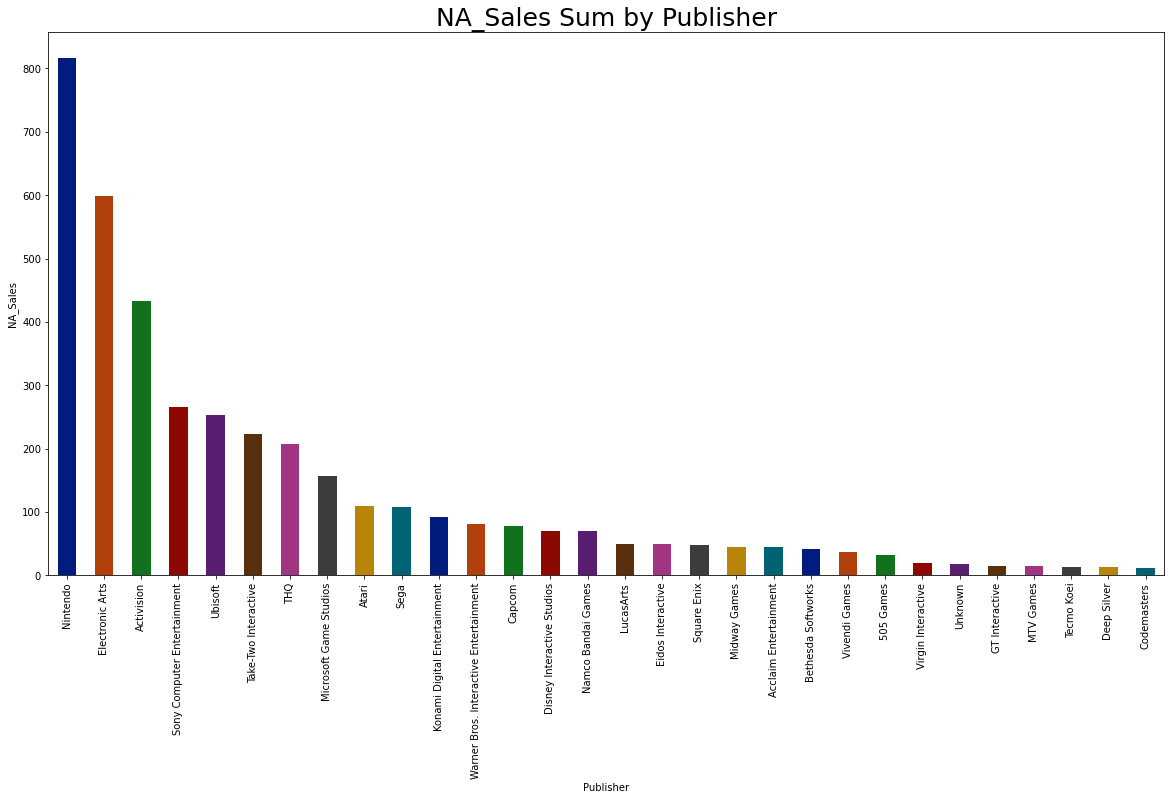

<Figure size 432x288 with 0 Axes>

In [48]:
pub_sort=publisher["NA_Sales"].sum().sort_values(ascending=False)
pub_sort.head(30).plot(kind="bar", figsize=(20,10), color = sns.color_palette("dark"))

#pub_sort.head(30["NA_Sales"].max())
plt.xlabel("Publisher",fontsize = 10)
plt.ylabel("NA_Sales",fontsize = 10)
plt.title("NA_Sales Sum by Publisher", fontsize=25)

plt.savefig('Output Data/NA_Sales by Publisher.png')
plt.show()
plt.tight_layout()
